**CNIT 483 Project**: 
Sigh language image detection with the Convolutional Neural Network

In [44]:
# imported libraies
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import skimage
from skimage.transform import resize
from sklearn.model_selection import train_test_split

In [45]:
#imported data
train_dir = "/Users/jackmahedy/Desktop/483 Project/asl_alphabet_train/"
class_name = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P',
              'Q','R','S','T','U','V','W','X','Y','Z','del','nothing','space']

def get_data(folder):
    x = np.empty((87000, 64, 64, 3), dtype=np.float32)
    y = np.empty((87000,), dtype=np.int64)
    cnt = 0
    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):
            if folderName in ['A']:
                label = 0
            elif folderName in ['B']:
                label = 1
            elif folderName in ['C']:
                label = 2
            elif folderName in ['D']:
                label = 3
            elif folderName in ['E']:
                label = 4
            elif folderName in ['F']:
                label = 5
            elif folderName in ['G']:
                label = 6
            elif folderName in ['H']:
                label = 7
            elif folderName in ['I']:
                label = 8
            elif folderName in ['J']:
                label = 9
            elif folderName in ['K']:
                label = 10
            elif folderName in ['L']:
                label = 11
            elif folderName in ['M']:
                label = 12
            elif folderName in ['N']:
                label = 13
            elif folderName in ['O']:
                label = 14
            elif folderName in ['P']:
                label = 15
            elif folderName in ['Q']:
                label = 16
            elif folderName in ['R']:
                label = 17
            elif folderName in ['S']:
                label = 18
            elif folderName in ['T']:
                label = 19
            elif folderName in ['U']:
                label = 20
            elif folderName in ['V']:
                label = 21
            elif folderName in ['W']:
                label = 22
            elif folderName in ['X']:
                label = 23
            elif folderName in ['Y']:
                label = 24
            elif folderName in ['Z']:
                label = 25
            elif folderName in ['del']:
                label = 26
            elif folderName in ['nothing']:
                label = 27
            elif folderName in ['space']:
                label = 28           
            else:
                label = 29
            for image_filename in os.listdir(folder + folderName):
                img_file = cv2.imread(folder + folderName + '/' + image_filename)
                if img_file is not None:
                    img_file = skimage.transform.resize(img_file, (64, 64, 3))
                    img_arr = np.asarray(img_file).reshape((-1, 64, 64, 3))
                    x[cnt] = img_arr
                    y[cnt] = label
                    cnt += 1
    return x, y
x_data, y_data = get_data(train_dir)

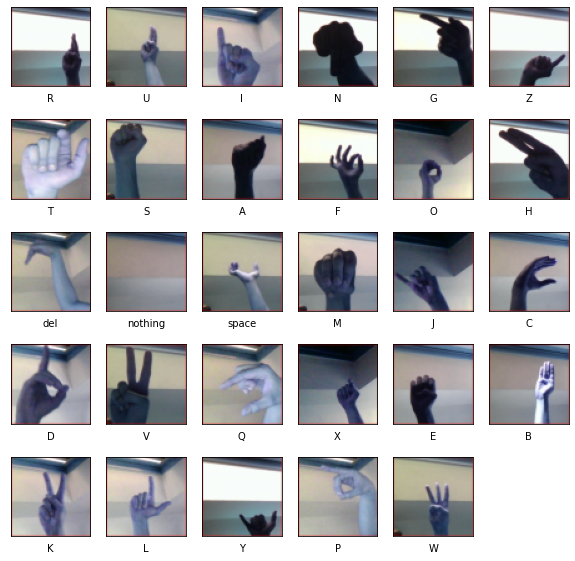

In [46]:
j = 1
plt.figure(figsize=(10,10))
for i in range(0, 87000, 3000):
    plt.subplot(5, 6, j)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_data[i], cmap = plt.cm.binary)
    plt.xlabel(class_name[y_data[i]])
    j = j + 1
plt.show()

In [47]:
#split test and train data
train_images, test_images, train_labels, test_labels = train_test_split(x_data, y_data, test_size=0.3)

In [48]:
#check dimensions
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60900, 64, 64, 3)
(60900,)
(26100, 64, 64, 3)
(26100,)


In [49]:
#Build CNN
model = models.Sequential()
model.add(layers.Conv2D(100, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(100, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(100, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten()) #3D to 2D
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(29)) #output layer
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 64, 64, 100)       2800      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 32, 32, 100)      0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 30, 30, 100)       90100     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 15, 15, 100)      0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 13, 13, 100)       90100     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 6, 6, 100)       

In [50]:
#Compiled and trained model
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1904/1904 [==============================] - 423s 222ms/step - loss: 0.8936 - accuracy: 0.7283 - val_loss: 0.1845 - val_accuracy: 0.9441
Epoch 2/5
1904/1904 [==============================] - 426s 224ms/step - loss: 0.1055 - accuracy: 0.9657 - val_loss: 0.1136 - val_accuracy: 0.9627
Epoch 3/5
1904/1904 [==============================] - 425s 223ms/step - loss: 0.0542 - accuracy: 0.9825 - val_loss: 0.1018 - val_accuracy: 0.9653
Epoch 4/5
1904/1904 [==============================] - 426s 224ms/step - loss: 0.0449 - accuracy: 0.9861 - val_loss: 0.0193 - val_accuracy: 0.9941
Epoch 5/5
1904/1904 [==============================] - 429s 225ms/step - loss: 0.0354 - accuracy: 0.9895 - val_loss: 0.0180 - val_accuracy: 0.9939


816/816 - 56s - loss: 0.0180 - accuracy: 0.9939 - 56s/epoch - 68ms/step
0.993946373462677


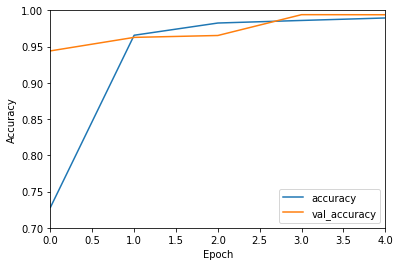

In [54]:
#Evaluated the CNN Model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xlim([0, 4])
plt.ylim([0.7, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)